In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), st.sem(data)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [4]:
lag = 512

base = pd.read_pickle('./pkl_datasets/mamiraua_dataset_ACF_' + str(lag) + '.gzip')
cotas = pd.read_csv('./boundary_files/Cotas_HxC_bins_' + str(int(lag)) + '.csv')
noise = pd.read_csv('./coloredNoises/coloredNoises_' + str(int(lag)) + '.csv')

In [7]:
df = base[base['date'] == '20160902']

H1 = df.loc[df['time'] == '110000']['H']
C1 = df.loc[df['time'] == '110000']['C']

time = np.unique(df['time'])
H_mu = np.empty((0))
H_CI = np.empty((0))

C_mu = np.empty((0))
C_CI = np.empty((0))

JSD_mu = np.empty((0))
JSD_CI = np.empty((0))

t = np.empty(0)
for j in time:
        t = np.append(t,str(j[0:2] + ':' + j[2:4]))
        H = df.loc[df['time'] == j]['H']
        H_mu = np.append(H_mu,np.mean(H))
        H_CI = np.append(H_CI,confidence_interval(H)[1])

        C = df.loc[df['time'] == j]['C']
        C_mu = np.append(C_mu,np.mean(C))
        C_CI = np.append(C_CI,confidence_interval(C)[1])
        
        JSD = df.loc[df['time'] == j]['JSD']
        JSD_mu = np.append(JSD_mu,np.mean(JSD))
        JSD_CI = np.append(JSD_CI,confidence_interval(JSD)[1])

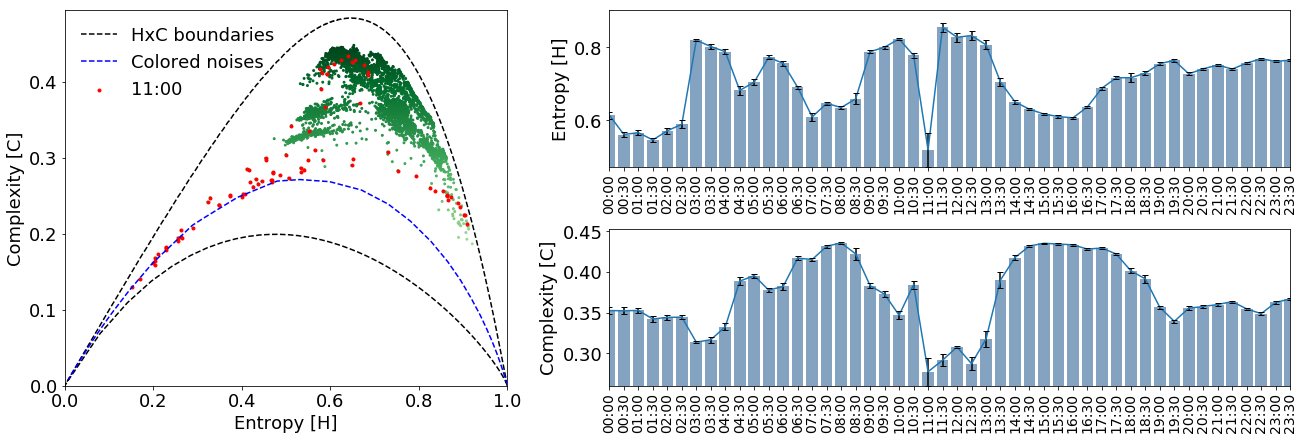

In [9]:
fig = plt.figure(figsize=(18,6),constrained_layout=True)
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
gs = fig.add_gridspec(2, 2, wspace=0.5, width_ratios=[1.3,2], height_ratios=[2,2])

ax1 = fig.add_subplot(gs[:,0])
ax1.plot(cotas['Entropy'],cotas['Complexity'], '--k', label = 'HxC boundaries')
ax1.plot(noise['Entropy'],noise['Complexity'], '--b', label = 'Colored noises')
plt.xlim([0, 1])
plt.ylim([0, np.max(cotas['Complexity'])+0.01])
plt.ylabel('Complexity [C]')
plt.xlabel('Entropy [H]')
plt.legend(loc = 'upper left', frameon=False)

ax1.scatter(df['H'], df['C'], marker='.', s=15, c=df['C'], label = '',
            norm=plt.Normalize(vmax=np.max(base['C']), vmin=np.min(base['C'])-0.1),
            cmap = 'Greens') # seismic # viridis # plasma # jet # PuBu # YlOrRd # Blues

ax1.scatter(H1, C1, marker='.', s=35, c='r', label = '11:00') # seismic # viridis # plasma # jet # PuBu # YlOrRd # Blues
plt.legend(loc = 'upper left', frameon=False)


ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(H_mu)
ax2.bar(np.arange(len(H_mu)), H_mu, width=0.8, yerr=H_CI, capsize=3, tick_label = t, color=(0.2, 0.4, 0.6, 0.6))
plt.xlim([0, 47])
plt.ylim([np.min(H_mu)-np.max(H_CI),np.max(H_mu)+np.max(H_CI)])
plt.ylabel('Entropy [H]')
plt.xticks(rotation=90, fontsize=14)

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(C_mu)
ax3.bar(np.arange(len(C_mu)), C_mu, width=0.8, yerr=C_CI, capsize=3, tick_label = t, color=(0.2, 0.4, 0.6, 0.6))
plt.xlim([0, 47])
plt.ylim([np.min(C_mu)-np.max(C_CI),np.max(C_mu)+np.max(C_CI)])
plt.ylabel('Complexity [C]')
plt.xticks(rotation=90, fontsize=14)

# fig.savefig('./figures/Fig8.eps', format="eps", bbox_inches='tight')

plt.show()